## 라이브러리 임포트
- 실습에 필요한 라이브러리를 임포트한다

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기(학습데이터, 테스트데이터)
- 데이터 분석 단계에서 생성한 농구 포지션 예측하기의 학습 데이터 및 테스트데이터를 로드합니다.

In [19]:
train = pd.read_csv('data/csv/basketball_trian.csv')
test = pd.read_csv('data/csv/basketball_test.csv')

In [20]:
print(train.shape[0]) # 훈련용 데이터 셋 갯수
print(train.shape[1]) # feature 갯수

print(test.shape[0]) # feature 갯수
print(test.shape[1])  # 테스트용 데이터 셋 갯수

80
5
20
5


## 최적의 k찾기

In [21]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k값을 찾기, 3부터 사작해서 3max_k_range/2 까지의 범위.
max_k_range = train.shape[0]
k_list = []


for i in range(3, max_k_range//2, 2):  # 3, 5, .....39
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['3P','TRB','BLK']]  # dataFrame에서 행렬접근 방법 loc, iloc  2개의 피처로 
y_train = train[['Pos']]  # 결과값 

In [22]:
# 10-fold cross validation 
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors= k)  # 3,5,7.....,39까지의 값을 알고리즘에 적용한다.
    # cross_val_score 교차분석
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv = 10, scoring='accuracy') # ravel() 다시 1차원의 형태처럼 펼쳐지는 효과
    
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.9,
 0.9,
 0.9125,
 0.9375,
 0.9375,
 0.9375,
 0.925,
 0.9375,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.85,
 0.8375,
 0.8375,
 0.825,
 0.825,
 0.825]

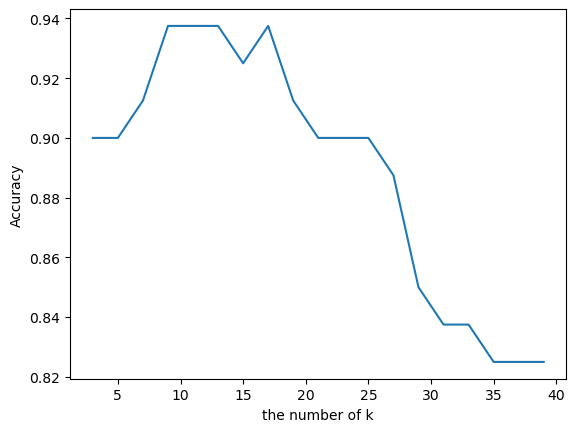

In [23]:
# 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [30]:
# 최적화 k값
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print('최적의 k값 :', str(k))

최적의 k값 : 9


## 2개 특징으로 예측하기('3P','BLK')

In [34]:
knn = KNeighborsClassifier(n_neighbors= k)

x_train = train[['3P','BLK']]
y_train = train[['Pos']]   # 2차원이여서 1차원으로 변경해서 학습시켜야한다.

knn.fit(x_train, y_train.values.ravel())  # fit()는 훈련데이터를 사용해서 KNN 알고리즘에 훈려시켜주는 메서드

x_test = test[['3P','BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)   #predict() test을 검증하는 메서드

In [35]:
comparision = pd.DataFrame({'prediction:':pred, 'tarket':y_test.values.ravel()})
comparision

,prediction:,tarket
0,C,C
1,C,C
2,C,C
3,C,C
4,C,C
5,SG,SG
6,SG,SG
7,SG,SG
8,C,C
9,SG,SG


In [37]:
from sklearn.metrics import accuracy_score

# accuracy_score() 예측값과 정답값을 넣어주면 알아서 정확도를 계산해주는 메서드
print('accuracy :' + str(accuracy_score(y_test.values.ravel(), pred)))  

accuracy :0.95


## 3개의 특징으로 예측하기('3P', 'TRB', 'BLK')

In [38]:
knn = KNeighborsClassifier(n_neighbors= k)

x_train = train[['3P','TRB','BLK']]
y_train = train[['Pos']]   # 2차원이여서 1차원으로 변경해서 학습시켜야한다.

knn.fit(x_train, y_train.values.ravel())  # fit()는 훈련데이터를 사용해서 KNN 알고리즘에 학습시켜주는 메서드

x_test = test[['3P','TRB', 'BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)   #predict()예측을 해준는 메서드

In [40]:
comparision = pd.DataFrame({'prediction:':pred, 'tarket':y_test.values.ravel()})
comparision

,prediction:,tarket
0,C,C
1,C,C
2,C,C
3,C,C
4,C,C
5,SG,SG
6,SG,SG
7,SG,SG
8,C,C
9,SG,SG


In [41]:
print('accuracy :' + str(accuracy_score(y_test.values.ravel(), pred)))  # accuracy_score() 정확도를 계산하는 메서드

accuracy :0.85
